<a href="https://colab.research.google.com/github/akbarymam/Awesome-Projects/blob/main/Data_Forecasting_Kelompok_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import it matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_excel('/content/Dataset.xlsx', parse_dates = True)
df

,Tanggal,Penjualan (item)
0,2023-01-01,0
1,2023-01-02,27
2,2023-01-03,458
3,2023-01-04,20
4,2023-01-05,7
...,...,...
116,2023-04-27,430
117,2023-04-28,208
118,2023-04-29,200
119,2023-04-30,0


In [ ]:
# Menghapus baris yang mengandung missing values (NaN)
df = df.loc[(df!=0).any(axis=1)]
df.head()

,Tanggal,Penjualan (item)
0,2023-01-01,0
1,2023-01-02,27
2,2023-01-03,458
3,2023-01-04,20
4,2023-01-05,7


In [ ]:
df.columns

Index(['Tanggal', 'Penjualan (item)'], dtype='object')

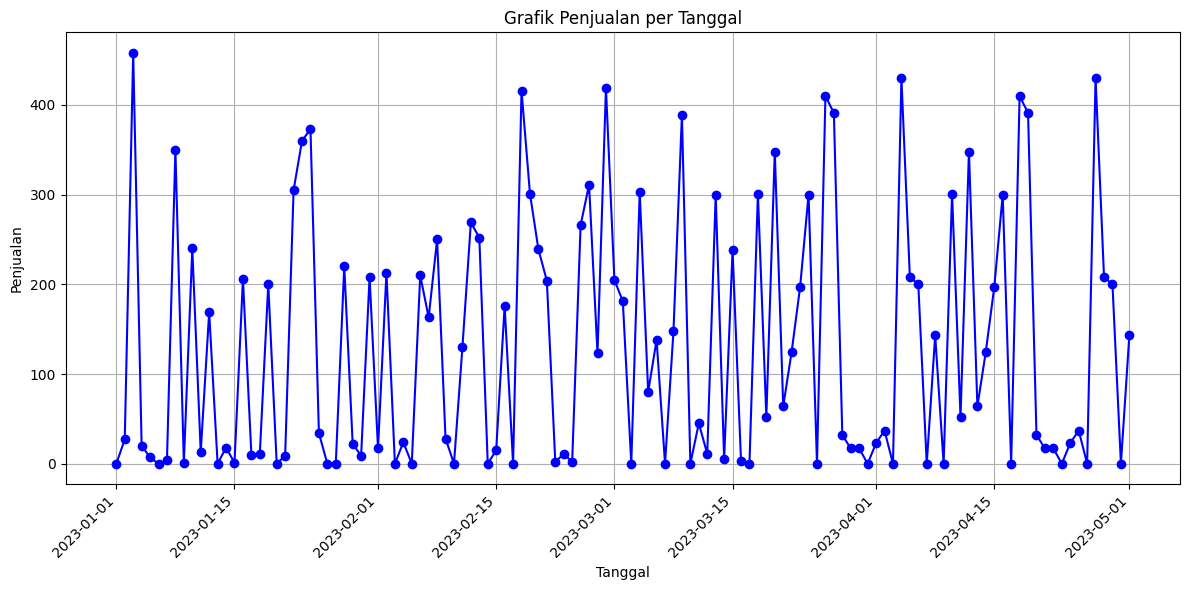

In [ ]:
# Membuat plot
plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Penjualan (item)'], marker='o', linestyle='-', color='b')
plt.title('Grafik Penjualan per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.xticks(rotation=45, ha='right')  # Set tick positions to every date
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Melakukan uji Augmented Dickey-Fuller Test
result = adfuller(df['Penjualan (item)'], autolag='AIC')

# Menampilkan hasil uji
print(f'Hasil Augmented Dickey-Fuller Test:')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Menampilkan kesimpulan berdasarkan p-value
if result[1] <= 0.05:
    print('Data sudah stasioner (Tolak H0)')
else:
    print('Data belum stasioner (Terima H0)')

Hasil Augmented Dickey-Fuller Test:
ADF Statistic: -11.168285546738286
p-value: 2.6799499344227537e-20
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Data sudah stasioner (Tolak H0)


In [ ]:
# Fungsi untuk uji ADF dan interpretasi hasil
def adf_test(data, column_name):
    result = adfuller(data)
    uji_statistik, p_value, _, _, nilai_kritis, _ = result

    print(f"Hasil uji ADF untuk kolom '{column_name}':")
    print(f"Nilai statistik uji: {uji_statistik}")
    print(f"Nilai p-value: {p_value}")
    print(f"Nilai Kritis:")
    for key, value in nilai_kritis.items():
        print(f"    {key}: {value}")

    if p_value < 0.05 and uji_statistik < nilai_kritis['5%']:
        print("Data cenderung stasioner")
    else:
        print("Data cenderung tidak stasioner. Data perlu diolah lebih lanjut.")

# Ganti 'nama_kolom' dengan nama kolom yang ingin diuji
nama_kolom = 'Penjualan (item)'
kolom_data = df[nama_kolom]

# Uji ADF pada kolom_data
adf_test(kolom_data, nama_kolom)

Hasil uji ADF untuk kolom 'Penjualan (item)':
Nilai statistik uji: -11.168285546738286
Nilai p-value: 2.6799499344227537e-20
Nilai Kritis:
    1%: -3.486055829282407
    5%: -2.8859430324074076
    10%: -2.5797850694444446
Data cenderung stasioner


<Figure size 1200x600 with 0 Axes>

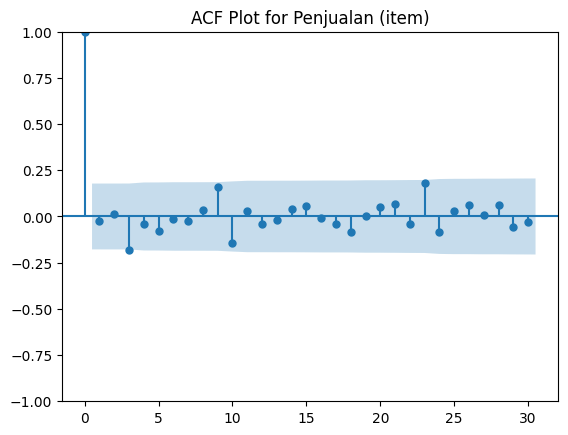

<Figure size 1200x600 with 0 Axes>

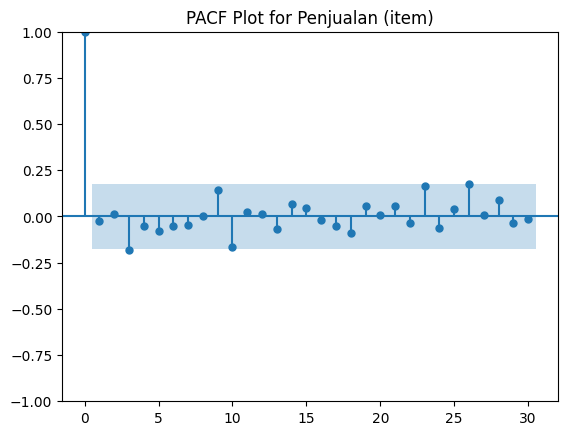

In [ ]:
# Menampilkan plot ACF
plt.figure(figsize=(12, 6))
plot_acf(kolom_data, lags=30, title=f'ACF Plot for {nama_kolom}')
plt.show()

# Menampilkan plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(kolom_data, lags=30, title=f'PACF Plot for {nama_kolom}')
plt.show()

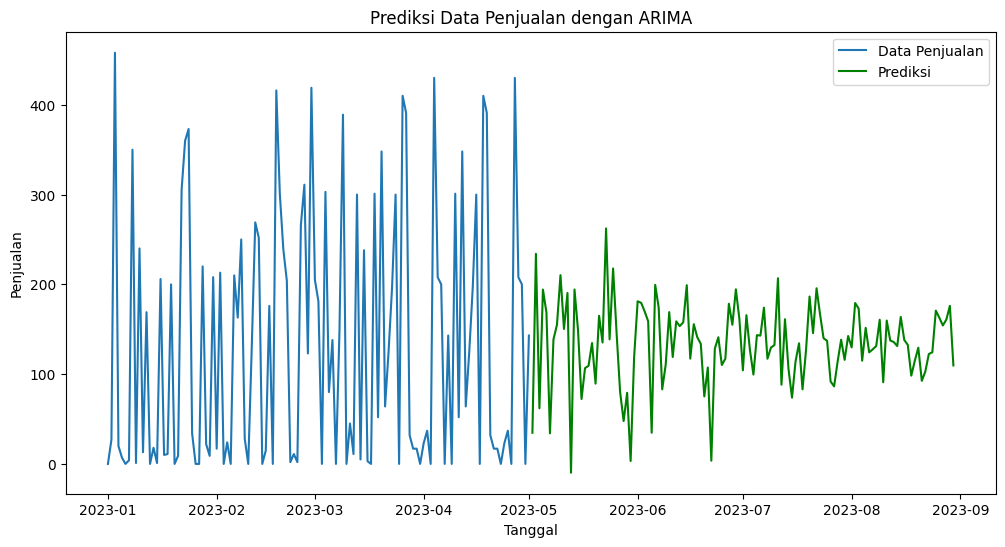

In [ ]:
# Ensure 'penjualan_column' is numeric (convert if needed)
df['Penjualan (item)'] = pd.to_numeric(df['Penjualan (item)'], errors='coerce')

# Membuat model ARIMA
model = ARIMA(df['Penjualan (item)'], order=(50, 1, 50))  # Sesuaikan order dengan karakteristik data Anda
fit_model = model.fit()

# Melakukan prediksi
predictions = fit_model.get_forecast(steps=len(df))
predicted_mean = predictions.predicted_mean

# Membuat plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(df['Penjualan (item)'], label='Data Penjualan')
plt.plot(predicted_mean, label='Prediksi', color='green')
plt.title('Prediksi Data Penjualan dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.show()